# Modelo BLM trafico

 Es un modelo de automatas celulares proupuesto por Biham y Middleton en 1995.<a href="url">[1]</a>.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from IPython.display import display, clear_output
import time
import matplotlib.animation as animation
import matplotlib.animation as TimedAnimation

In [2]:
class Model:
  def __init__(self,G,pos,grid=False):
    self.G = G
    self.pos = pos
    self.grid = grid
    self.dic = {}
    self.Nx = np.sort([u[0] for u in G.nodes()])[-1]
    self.Ny = np.sort([u[1] for u in G.nodes()])[-1]
  def initialize(self,p=0.1):
    attr = {u:{'st':np.random.choice([0,1],p=[1-p,p])} for u in self.G.nodes()}
    nx.set_node_attributes(self.G,attr)
    return

  def cs(self,u):
    if u in self.dic.keys():
      if self.dic[u]==0:
        return True
      else:
        return False
    else:
      return True


  def check(self,i):
    x,y = i #coordinates
    neigh_disp = [u for u in nx.neighbors(self.G,i) if ((u[0]>x or u[1]>y) and self.G.nodes(data=True)[u]['st']==0 and self.cs(u))]
    if self.grid==True:
      #N = np.sqrt(len([u for u in G.nodes()]))-1
      if x==self.Nx:
        aux = [(0,y),(x,int((y+1)%self.Ny))]
        neigh_disp = [u for u in aux if (self.G.nodes[u]['st']==0 and self.cs(u))]
      elif y==self.Ny:
        aux = [(x,0),(int((x+1)%self.Nx),y)]
        neigh_disp = [u for u in aux if (self.G.nodes[u]['st']==0 and self.cs(u))]
    return neigh_disp
  def move(self,i):
    neigh_disp = self.check(i)
    if neigh_disp == []:
      return
    j = np.random.randint(0,len(neigh_disp))
    #self.G.nodes[neigh_disp[j]]['st'] = 1
    #self.G.nodes[i]['st'] = 0
    self.dic[neigh_disp[j]] = 1
    self.dic[i] = 0
    #print(self.dic)
    return

  def step(self):
    for u in self.G.nodes():
      if self.G.nodes[u]['st']==1:
        self.move(u)
    #update state
    #print(self.dic)
    for u in self.dic.keys():
      self.G.nodes[u]['st'] = self.dic[u]
    self.dic = {}

  def check_n(self):
    return np.sum([self.G.nodes[u]['st'] for u in self.G.nodes()])

  def get_state(self,ax):
    pos = self.pos
    nodes_r = [u for u in self.G.nodes() if self.G.nodes[u]['st']==1]
    nodes_b = [u for u in self.G.nodes() if self.G.nodes[u]['st']==0]
    nx.draw_networkx_nodes(self.G,pos,nodes_r,node_color='red',node_size=2,ax=ax)
    nx.draw_networkx_nodes(self.G,pos,nodes_b,node_color='white',node_size=2,ax=ax)
    nx.draw_networkx_edges(self.G,pos,self.G.edges(),alpha=0.3,ax=ax)







In [10]:
class Model_bml:
  def __init__(self,G,pos,grid=False):
    self.G = G
    self.pos = pos
    self.grid = grid
    self.dic = {} # save moves in a step to avoid two automatas occupy the same node(not useful for bml)
    self.Nx = np.sort([u[0] for u in G.nodes()])[-1]
    self.Ny = np.sort([u[1] for u in G.nodes()])[-1]
    self.vel_up = []
    self.vel_r = []
  def initialize(self,p=0.1):
    "args p : probabilidad de ocupancia"

    attr = {u:{'st':np.random.choice([0,1,-1],p=[1-p,p/2,p/2])} for u in self.G.nodes()}
    nx.set_node_attributes(self.G,attr)
    return

  def cs(self,u):
    if u in self.dic.keys():
      if self.dic[u]==0:
        return True
      else:
        return False
    else:
      return True


  def check_up(self,i):
    x,y = i #coordinates
    neigh_disp = [u for u in nx.neighbors(self.G,i) if ((u[1]>y) and self.G.nodes(data=True)[u]['st']==0 and self.cs(u))]
    if self.grid==True:
      #N = np.sqrt(len([u for u in G.nodes()]))-1
      if y==self.Ny:
        aux = [(x,0)]
        neigh_disp = [u for u in aux if (self.G.nodes[u]['st']==0 and self.cs(u))]
    return neigh_disp
  def check_right(self,i):
    x,y = i #coordinates
    neigh_disp = [u for u in nx.neighbors(self.G,i) if ((u[0]>x) and self.G.nodes(data=True)[u]['st']==0 and self.cs(u))]
    if self.grid==True:
      N = np.sqrt(len([u for u in G.nodes()]))-1
      if x==self.Nx:
        aux = [(0,y)]
        neigh_disp = [u for u in aux if (self.G.nodes[u]['st']==0 and self.cs(u))]
    return neigh_disp
  def move_up(self,i):
    neigh_disp = self.check_up(i)
    if neigh_disp == []:
      self.vel_up.append(0)
      return
    j = np.random.randint(0,len(neigh_disp))
    self.dic[neigh_disp[j]] = 1
    self.dic[i] = 0
    self.vel_up.append(1)
    return
  def move_right(self,i):
    neigh_disp = self.check_right(i)
    if neigh_disp == []:
      self.vel_r.append(0)
      return
    j = np.random.randint(0,len(neigh_disp))
    self.dic[neigh_disp[j]] = -1
    self.dic[i] = 0
    self.vel_r.append(1)
    return

  def step(self):
    for u in self.G.nodes():
      if self.G.nodes[u]['st']==1:
        self.move_up(u)
    for u in self.dic.keys():
      self.G.nodes[u]['st'] = self.dic[u]
    self.dic = {}
    for u in self.G.nodes():
      if self.G.nodes[u]['st']==-1:
        self.move_right(u)
    for u in self.dic.keys():
      self.G.nodes[u]['st'] = self.dic[u]
    self.dic = {}
    #update state
    #print(self.dic)


  def check_n(self):
    return np.sum([self.G.nodes[u]['st'] for u in self.G.nodes() if self.G.nodes[u]['st'] ==1]),np.sum([self.G.nodes[u]['st'] for u in self.G.nodes() if self.G.nodes[u]['st'] ==-1])

  def get_state(self,ax):
    pos = self.pos
    nodes_up = [u for u in self.G.nodes() if self.G.nodes[u]['st']==1]
    nodes_b = [u for u in self.G.nodes() if self.G.nodes[u]['st']==0]
    nodes_right = [u for u in self.G.nodes() if self.G.nodes[u]['st']==-1]
    nx.draw_networkx_nodes(self.G,pos,nodes_up,node_color='red',node_size=2,ax = ax)
    nx.draw_networkx_nodes(self.G,pos,nodes_right,node_color='blue',node_size=2,ax=ax)
    nx.draw_networkx_nodes(self.G,pos,nodes_b,node_color='white',node_size=2,ax=ax)
    nx.draw_networkx_edges(self.G,pos,self.G.edges(),alpha=0.1,ax=ax)
    return ax,

  def vel_simulate(self,N,tc_up=False,tc_r=False):
    Vel1 = []
    Vel2 = []
    VelT = []
    aux = 0
    for _ in range(N):
      self.step()
      Vel1.append(np.mean(self.vel_up))
      Vel2.append(np.mean(self.vel_r))
      sum = self.vel_up + self.vel_r
      VelT.append(np.mean(sum))
      self.vel_up = []
      self.vel_r = []
      if (Vel1[-1]==1. or Vel1[-1]==0.) and tc_up==True and tc_r==False:
        break
      if (Vel2[-1]==1. or Vel2[-1]==0.) and tc_r==True and tc_up==False:
        break
      if (VelT[-1]==1. or VelT[-1]==0) and tc_r==False and tc_up==False:
        break

    return VelT,Vel1,Vel2,np.arange(0,N)

  def simulate_gif(self,start = False,p=0.6):
    # Initialize figure and axis
    fig, ax = plt.subplots()
    if start == True:
      model.initialize(p=p)
    model.get_state(ax)

    # Plot initial data
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Simulation with Timer')

    # Simulation function
    def update_plot(frame):
      model.step()
      return model.get_state(ax)


    def animate(frame):
      ax.clear()
      return update_plot(frame * 0.1)

    ani = animation.FuncAnimation(fig, animate, frames=500, interval=100)  # Adjust frames and interval for speed

    plt.close()  # To prevent displaying duplicate animations in Jupyter

    return ani






## Lattice cuadrado N x N
Parametros
- $p$ = Probabilidad de que una casilla este ocupada(Nodo este ocupado).
- $p_r$ = Probailidad de que una casilla este ocupada por un agente que se mueve a la derecha
- $p_u$ = Probailidad de que una casilla este ocupada por un agente que se mueve hacia arriba.
-$N$ := Tamaño del sistema

In [11]:
#Parametros
p = 0.5
N = 20

In [12]:
#Construcción malla
G = nx.grid_2d_graph(N,N)
pos = {u:(u[0],u[1]) for u in G.nodes()}
#Contrucción modelo
model = Model_bml(G,pos,True)
#Inizializacion del model : Asignar automatas con probabilidad p
model.initialize(p)

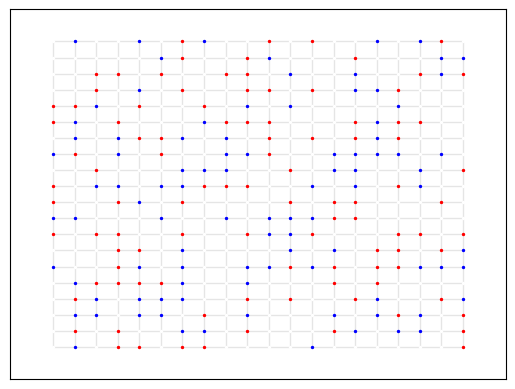

In [13]:
#Grafica del sistema
fig,ax = plt.subplots()
model.get_state(ax)
plt.show()

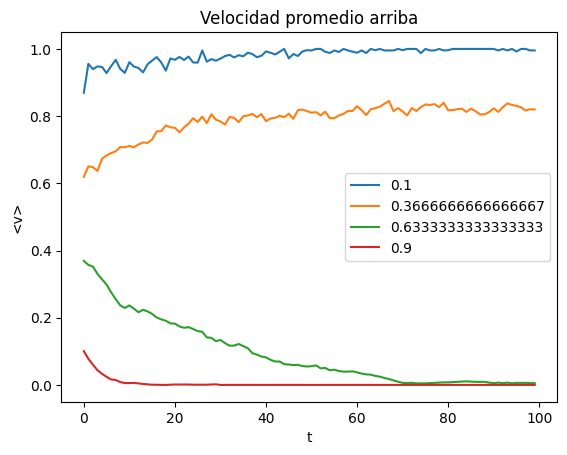

In [16]:
P = np.linspace(0.1,0.9,4)
for p in P:
  VV1 = []
  VV2 = []
  for _ in range(10):
    model = Model_bml(G,pos,True)
    model.initialize(p)
    Vel,V1,V2,t = model.vel_simulate(100,tc_r=True,tc_up=True)
    VV1.append(V1)
    VV2.append(V2)
  plt.plot(t,np.mean(np.array(VV1),axis=0),label=str(p))
plt.title('Velocidad promedio arriba')
plt.legend()
plt.xlabel('t')
plt.ylabel('<v>')
plt.show()


En principio se pensaba que habian dos fases : Una de congestión y otra de transito libre. El sistema despues de un tiempo $T_{med}$ llegaria a una de estas dependiendo de $N$ y $p$.
 - La fase de congestión se caracteriza por $\bar{v} = 0$
 - La fase de transito libre se caracteriza por $\bar{v} = 1$

Con $\bar{v}$ la velocidad promedio del sistema.

In [18]:
#<t_lim> vs <p>
P = np.linspace(0.3,0.6,4)
Nt = []
N = 1000
for p in P:
  print(p)
  Nnt = []
  for _ in range(10):
    model = Model_bml(G,pos,True)
    model.initialize(p)
    VelT,V1,V2,t = model.vel_simulate(N)
    Nnt.append(len(VelT))
  Nt.append(np.mean(Nnt))


0.3
0.39999999999999997
0.5
0.6


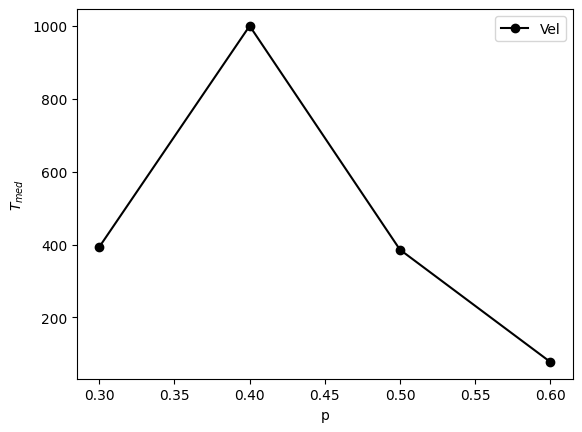

In [19]:
plt.plot(P,Nt,'-ok',label='Vel')
plt.xlabel('p')
plt.ylabel(r'$T_{med}$')
plt.legend()
plt.show()

In [ ]:
#<t_lim(up)> vs <p>
P = np.linspace(0.3,0.6,4)
Ny = []
Nx = []
N = 1000
for p in P:
  print(p)
  Nny = []
  for _ in range(10):
    model = Model_bml(G,pos,True)
    model.initialize(p)
    V1,V2,t = model.vel_simulate(N,tc_up=True)
    Nny.append(len(V1))
  Ny.append(np.mean(Nny))



In [ ]:
P = np.linspace(0.3,0.6,4)
Nx = []
N = 1000
for p in P:
  print(p)
  Nnx = []
  for _ in range(10):
    model = Model_bml(G,pos,True)
    model.initialize(p)
    V1,V2,t = model.vel_simulate(N,tc_r=True)
    Nnx.append(len(V2))
  Nx.append(np.mean(Nnx))

0.3
0.39999999999999997
0.5
0.6


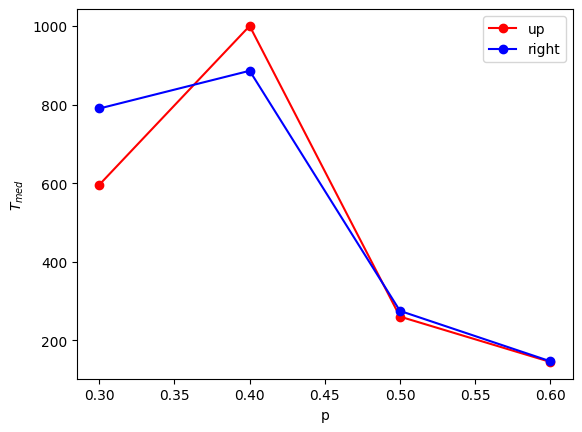

In [ ]:
plt.plot(P,Ny,'-or',label='up')
plt.plot(P,Nx,'-ob',label='right')
plt.xlabel('p')
plt.ylabel(r'$T_{med}$')
plt.legend()
plt.show()

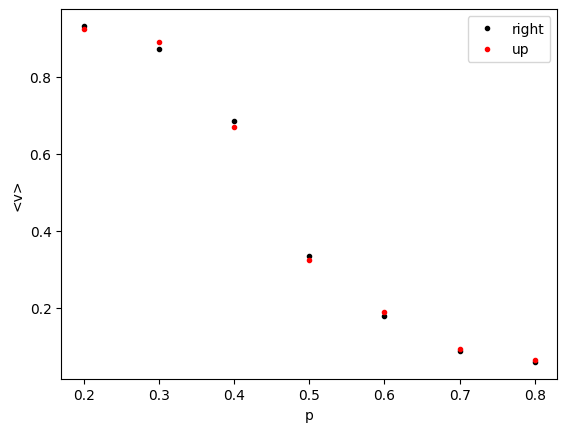

In [25]:
P = np.linspace(0.2,0.8,7)
Vx = []
Vy = []
for p in P:
  VV1 = []
  VV2 = []
  for _ in range(10):
    model = Model_bml(G,pos,True)
    model.initialize(p)
    VelT,V1,V2,t = model.vel_simulate(100)
    VV1.append(np.mean(V1))
    VV2.append(np.mean(V2))
  Vy.append(np.mean(VV1))
  Vx.append(np.mean(VV2))
plt.plot(P,Vx,'.k',label='right')
plt.plot(P,Vy,'.r',label='up')
plt.legend()
plt.xlabel('p')
plt.ylabel('<v>')
plt.show()

In [ ]:
G = nx.grid_2d_graph(512,512)
#G = nx.triangular_lattice_graph(50,50)
p = 0.5
pos = {u:(u[0],u[1]) for u in G.nodes()}
model = Model_bml(G,pos,True)

In [ ]:
ani = model.simulate_gif(start = True,p = 0.5)

In [ ]:
 # Display the animation
from IPython.display import HTML
HTML(ani.to_jshtml())

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, clear_output
import time
import matplotlib.animation as animation
import matplotlib.animation as TimedAnimation

# Initialize figure and axis
fig, ax = plt.subplots()
model.initialize(p=0.6)
model.get_state(ax)

# Plot initial data
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Simulation with Timer')

# Simulation function
def update_plot(frame):
    model.step()
    return model.get_state(ax)


def animate(frame):
    ax.clear()
    return update_plot(frame * 0.1)

ani = animation.FuncAnimation(fig, animate, frames=100, interval=100)  # Adjust frames and interval for speed

plt.close()  # To prevent displaying duplicate animations in Jupyter

# Display the animation
from IPython.display import HTML
HTML(ani.to_jshtml())



